In [44]:
# Import necessary librares
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# 1. Read the data

In [63]:
# Read the data
data = pd.read_csv('winequality-red.csv')
# See the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Examine the statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# buraya acıklama

In [8]:
# Show output values
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

# 2. Data Analysis

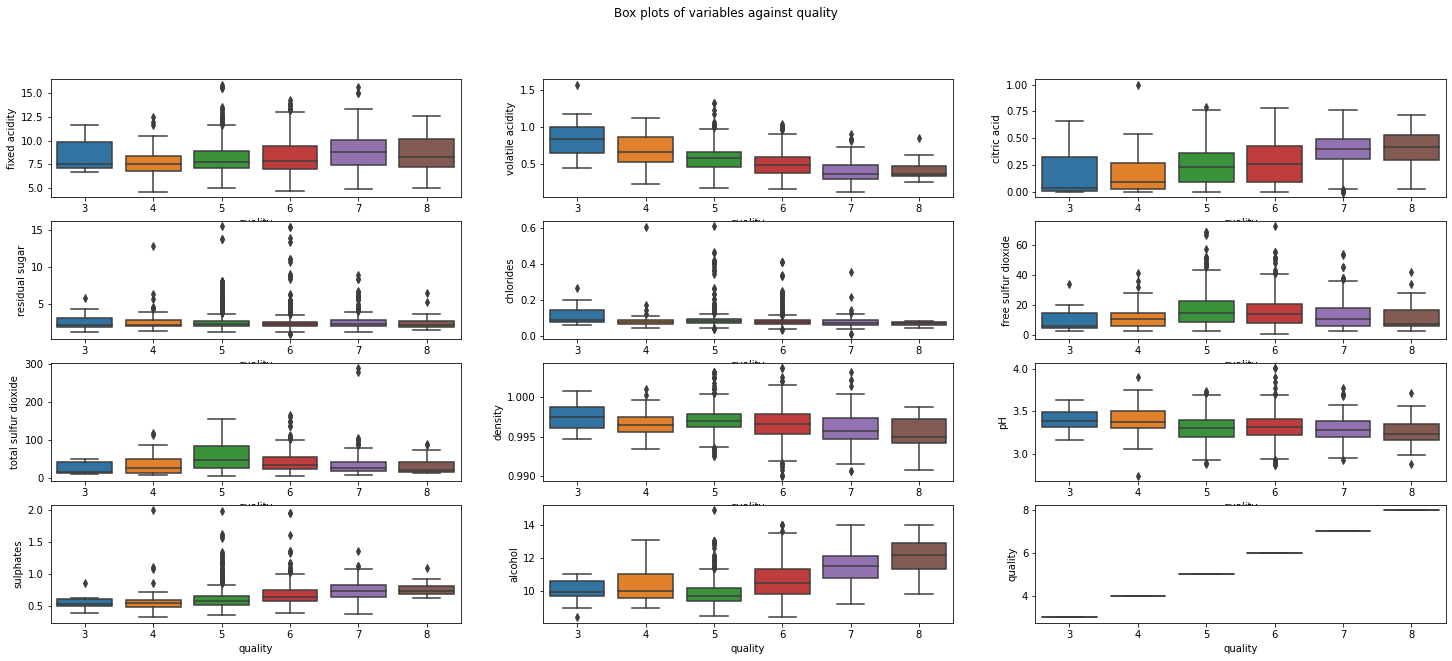

In [65]:
# Define the number of rows and columns for the subplot
nrows, ncols = 4, 3

# Create the subplot using the defined number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 10))

# Define the columns to plot
cols_to_plot = data.columns

# Loop through each column and plot it against the quality column
for i, col in enumerate(cols_to_plot):
    row_idx = i // ncols
    col_idx = i % ncols
    sns.boxplot(x='quality', y=col, data=data, ax=axes[row_idx][col_idx])
    
# Add a title for the entire plot
fig.suptitle('Box plots of variables against quality')

# Show the plot
plt.show()

/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

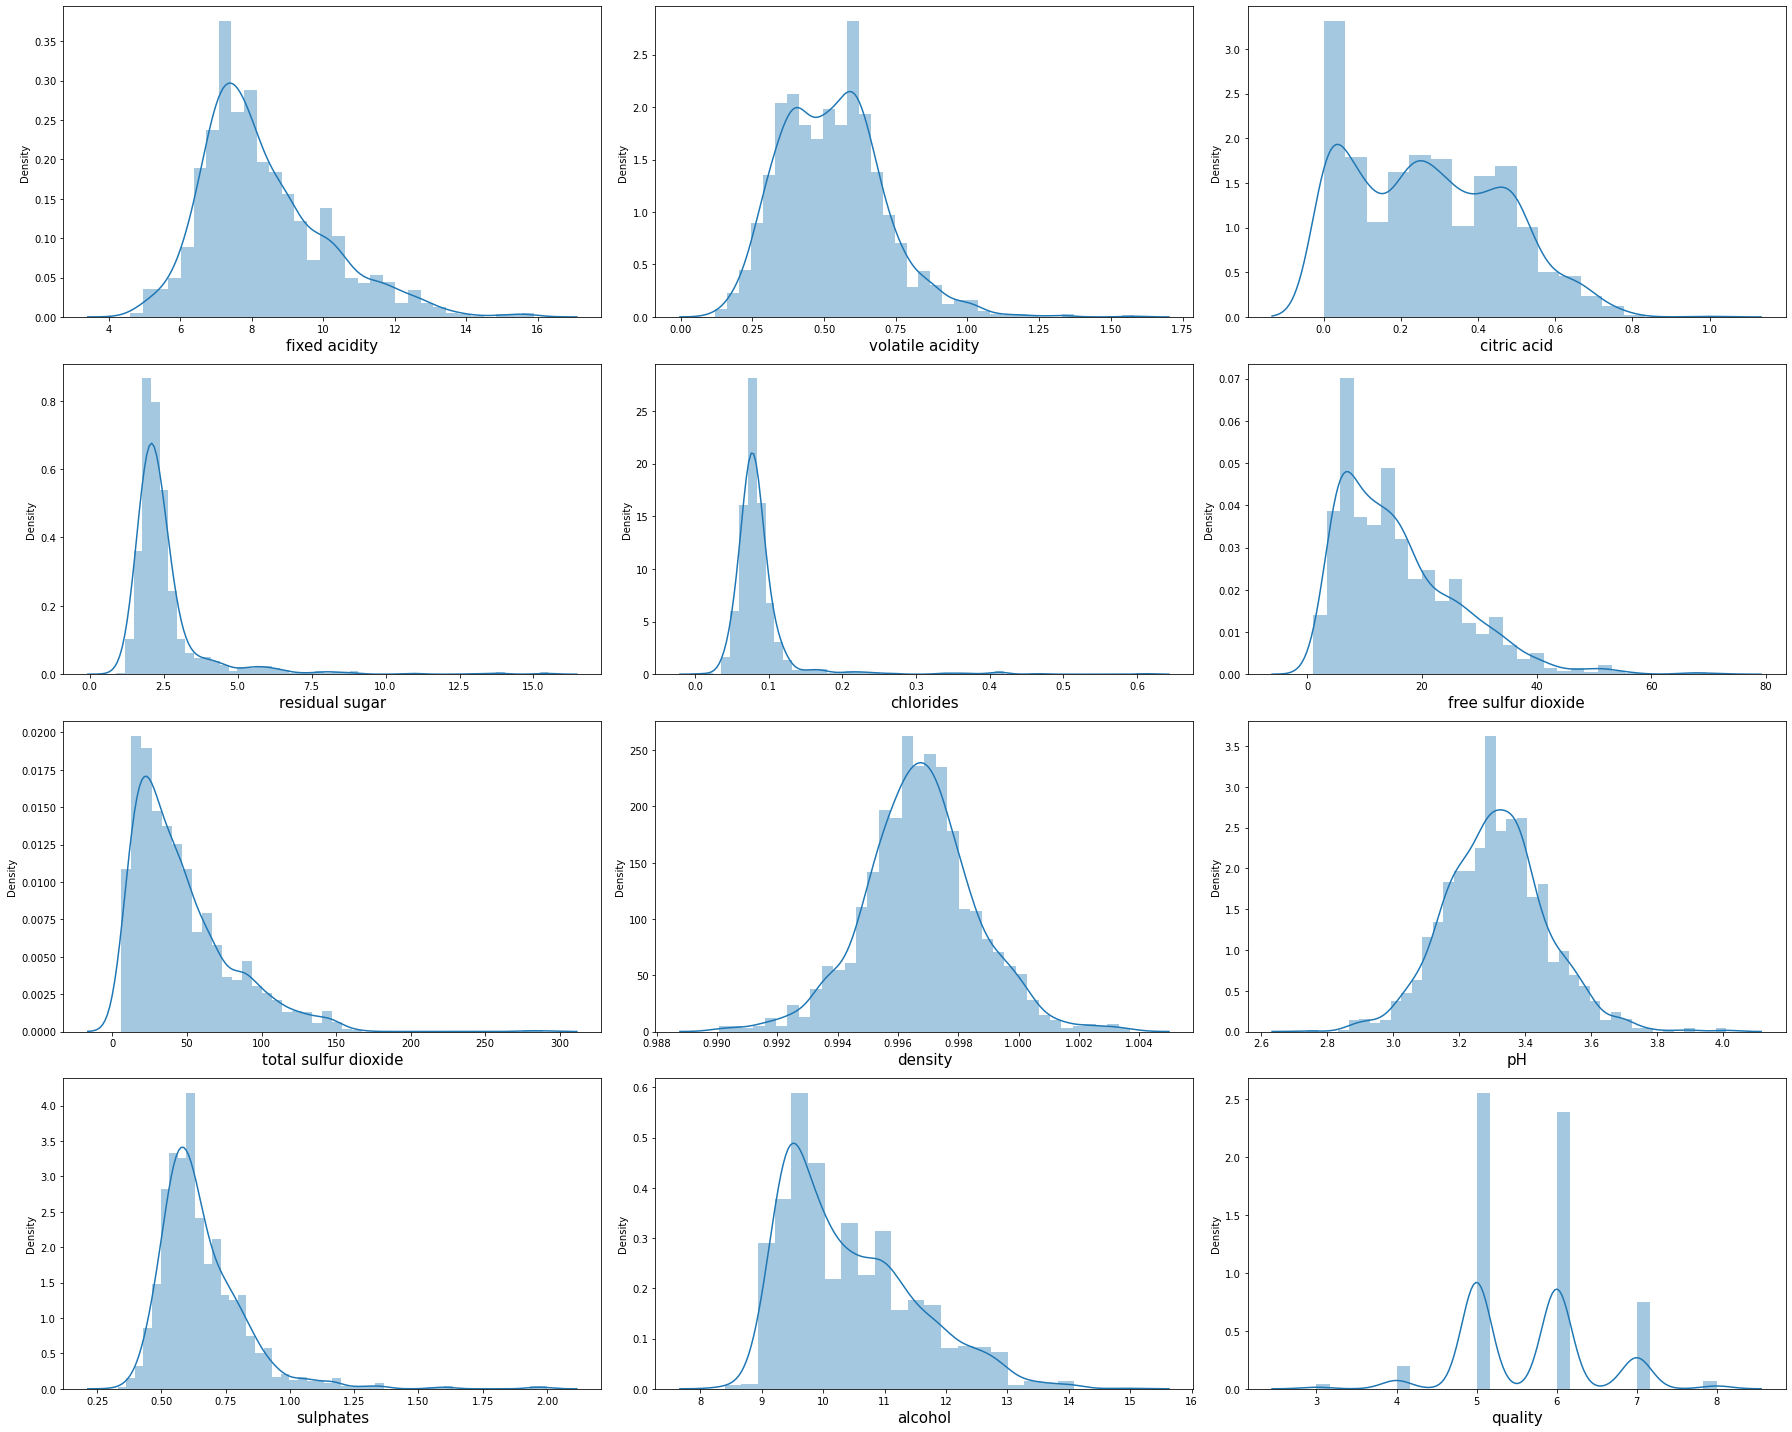

In [74]:
# Set the figure size
plt.figure(figsize=(25, 20))

# Initialize plot counter
plotnumber = 1

# Iterate over the columns of the dataframe
for col in data.columns:
    
    # Limit the number of subplots to 12
    if plotnumber <= 12:
        
        # Create a new subplot
        ax = plt.subplot(4, 3, plotnumber)
        
        # Plot the histogram using seaborn
        sns.hist(data[col], ax=ax)
        
        # Label the x-axis with the column name
        plt.xlabel(col, fontsize=15)
        
        # Increment the plot counter
        plotnumber += 1
    
# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()


<AxesSubplot:>

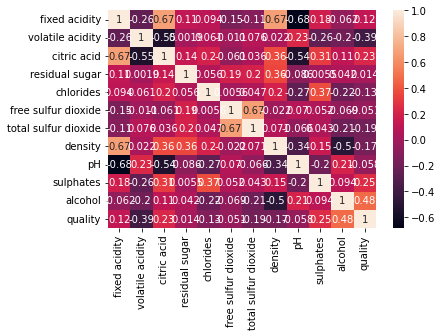

In [75]:
# Pearson Correlation

sns.heatmap(data.corr(), annot=True)

## 2.1 Findings from Data Analysis
* Based on the data analysis performed, it was found that certain columns contained outliers which could negatively impact the accuracy of the model. To address this issue, min-max scaling will be used as a normalization technique. By squeezing the data values between 0 and 1, this method effectively removes the impact of outliers and allowes for uniformity of scales across all features. This is important because the different value ranges of the features could lead to problems during model training.

* Additionally, the Pearson Correlation plot was used to investigate the presence of highly correlated features. It was observed that none of the features were highly correlated (using a threshold value of 0.8), indicating that each feature provided unique and valuable information that should be retained in the model.

*  Also, since some features have low correlation (< 0.3), it is reasonable not to use PCA, as it is generally used to reduce dimensionality when there are too many features or when there is high correlation between them.

# 3. Preprocessing

In [14]:
# Convert continuous output to categorical output:
# Bad: 3-5
# Good: 6-8
data["quality"] = pd.cut( data["quality"], bins = [2, 5, 8], labels = ["bad", "good"])
# Show output frequency
data["quality"].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [15]:
lb = LabelEncoder()
data["quality"] = lb.fit_transform(data["quality"])

In [16]:
data["quality"].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [17]:
# Seperate the dataset as features and output variable
X = data.drop("quality", axis = 1)
y = data["quality"]

In [50]:
# Split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# As we seen previously, we have imbalances classes. 
# Thus, we will perform oversampling, downsampling
# and SMOTE to balance the classes

# Oversample the minority class
X_resample = pd.concat([X_train, y_train], axis = 1)
good_quality = X_resample[X_resample["quality"] == 1]
bad_quality = X_resample[X_resample["quality"] == 0]

bad_quality_oversampled = resample(bad_quality, replace=True, n_samples=len(good_quality), random_state=42)
oversampled = pd.concat([good_quality, bad_quality_oversampled])

In [20]:
# See class counts
oversampled.quality.value_counts()

1    676
0    676
Name: quality, dtype: int64

In [21]:
oversampled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.69,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,1
354,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,1
342,10.9,0.39,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,1
1590,6.3,0.55,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,1
1404,8.0,0.50,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7,1


Now we have balanced classes!

In [22]:
y_train = oversampled["quality"]
x_train = oversampled.drop("quality", axis = 1)

In [23]:
# Scale the data
scaler = StandardScaler()
train_X = scaler.fit_transform(x_train)
test_X = scaler.transform(X_test)

## Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_X, y_train)

RandomForestClassifier()

In [25]:
y_hat = rfc.predict(test_X)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       141
           1       0.79      0.89      0.84       179

    accuracy                           0.81       320
   macro avg       0.81      0.79      0.80       320
weighted avg       0.81      0.81      0.80       320



In [26]:
print(confusion_matrix(y_test, y_hat))

[[ 98  43]
 [ 19 160]]


# Decision Tree

In [29]:
dt = DecisionTreeClassifier()
dt.fit(train_X, y_train)

DecisionTreeClassifier()

In [30]:
y_hat = dt.predict(test_X)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       141
           1       0.75      0.81      0.78       179

    accuracy                           0.74       320
   macro avg       0.74      0.73      0.73       320
weighted avg       0.74      0.74      0.74       320



# Logistic Regression

In [27]:
lr = SGDClassifier(loss="log")
lr.fit(train_X, y_train)

SGDClassifier(loss='log')

In [28]:
lr_y_hat = lr.predict(test_X)
print(classification_report(y_test, lr_y_hat))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       141
           1       0.75      0.72      0.74       179

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.71      0.71      0.71       320



In [31]:
# Now, apply undersample to balance the classes
good_quality_downsampled = resample(good_quality, replace=False, n_samples=len(bad_quality), random_state=42)

downsampled = pd.concat([good_quality_downsampled, bad_quality])

downsampled.quality.value_counts()


1    603
0    603
Name: quality, dtype: int64

In [32]:
y_train = downsampled["quality"]
x_train = downsampled.drop("quality", axis = 1)

In [34]:
# Scale the data
train_X = scaler.fit_transform(x_train)
test_X = scaler.transform(X_test)

In [37]:
# Random Forest Classifier
rfc_2 = RandomForestClassifier(n_estimators=100)
rfc_2.fit(train_X, y_train)

RandomForestClassifier()

In [38]:
y_hat = rfc_2.predict(test_X)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       141
           1       0.83      0.78      0.80       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



In [39]:
# Decision Tree
dt_2 = DecisionTreeClassifier()
dt_2.fit(train_X, y_train)

DecisionTreeClassifier()

In [40]:
y_hat = dt_2.predict(test_X)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       141
           1       0.74      0.70      0.72       179

    accuracy                           0.69       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.70      0.69      0.69       320



In [41]:
# Logistic regression
lr_2 = SGDClassifier(loss="log")
lr_2.fit(train_X, y_train)

SGDClassifier(loss='log')

In [42]:
lr_y_hat = lr_2.predict(test_X)
print(classification_report(y_test, lr_y_hat))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       141
           1       0.74      0.82      0.78       179

    accuracy                           0.74       320
   macro avg       0.74      0.73      0.73       320
weighted avg       0.74      0.74      0.73       320



In [51]:
# Now, apply SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [56]:
print("Before SMOTE: ", X_train.shape, y_train.shape)
print("After SMOTE: ", X_train_res.shape, y_train_res.shape)

Before SMOTE:  (1279, 11) (1279,)
After SMOTE:  (1352, 11) (1352,)


In [57]:
X_train_res = scaler.fit_transform(X_train_res)
test_X = scaler.transform(X_test)

In [58]:
smote_rfc = RandomForestClassifier(n_estimators=100)
smote_rfc.fit(X_train_res, y_train_res)
smote_pred = smote_rfc.predict(X_test)
print(classification_report(y_test, smote_pred))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45       141
           1       0.60      0.73      0.66       179

    accuracy                           0.58       320
   macro avg       0.57      0.56      0.56       320
weighted avg       0.57      0.58      0.57       320



/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [59]:
smote_dt = DecisionTreeClassifier()
smote_dt.fit(X_train_res, y_train_res)
smote_pred_dt = smote_dt.predict(X_test)
print(classification_report(y_test, smote_pred_dt))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61       141
           1       0.00      0.00      0.00       179

    accuracy                           0.44       320
   macro avg       0.22      0.50      0.31       320
weighted avg       0.19      0.44      0.27       320



/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F

In [60]:
smote_lr = SGDClassifier(loss="log")
smote_lr.fit(X_train_res, y_train_res)
smote_pred_lr = smote_lr.predict(X_test)
print(classification_report(y_test, smote_pred_lr))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52       141
           1       0.65      0.87      0.75       179

    accuracy                           0.67       320
   macro avg       0.68      0.64      0.63       320
weighted avg       0.68      0.67      0.65       320



/Users/utkuozbudak/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
